Inspired/based on https://github.com/rayidghani/magicloops and https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2019/lab6_feature_generation_sol.ipynb

In [479]:
import pipeline_evictions as pipeline
import ml_loop_evictions as loop

import importlib
import datetime
import pandas as pd
import numpy as np

# Read data

In [480]:
importlib.reload(pipeline)

datafile = "data/tracts.csv"

#Read data, parsing year column to date type
data = pd.read_csv(datafile, parse_dates=['year'])

# Explore data

In [481]:
#--->PENDING

# Create outcome label

In [482]:
importlib.reload(pipeline)

#--->PENDING
#In the mean time: Assigning 1 to everyone with eviction rate over 10%
data['top_10_percent'] = np.where(data['eviction-rate']>10, 1, 0)

label ='top_10_percent'

# Create temporal train and test sets

In [483]:
importlib.reload(pipeline)
from dateutil.relativedelta import relativedelta

#Create sets of train and test data, based on different split thresholds
#The split thresholds corresponds to the starting date of the testing data

#--->PENDING. How many splits?
split_thresholds = [pd.Timestamp(i,1,1) for i in range (2010, 2017)]

#Indicating which is the column to be used for splitting training and test daata
date_column='year'

#Amount of data used for test set
test_window = relativedelta(months=12)

#Gap needed between training and test set

#--->PENDING. To be changed. 1 year?
#Careful with possible error in create_temp_validation_train_and_testing_sets
#due to the fact that test_window and gap were equal.
gap_training_test = relativedelta(year=0)

#Generate train and test sets
train_test_sets= pipeline.create_temp_validation_train_and_testing_sets(
  data,
  date_column,
  label,
  split_thresholds,
  test_window,
  gap_training_test)

# Process data

In [484]:
importlib.reload(pipeline)

#Impute data on continuous columns for each training and test set

#--->PENDING
#In the meantime, imputing all float columns with mean

float_columns = [column for column in data.columns if data[column].dtype=='float']

#Do not consider GEOID column
float_columns=float_columns[1:]

for train_test_set in train_test_sets:
  train_data = train_test_set['x_train']
  test_data = train_test_set['x_test']

  #fill na values with mean
  pipeline.fill_na_columns_with_mean(train_data, float_columns)
  pipeline.fill_na_columns_with_mean(test_data, float_columns)


# Create features

In [485]:
importlib.reload(pipeline)

#We will have to generate features independently for each different train/test set
for train_test_set in train_test_sets:
  
  #--->PENDING. create_features function
  train_features, test_features = pipeline.create_features(train_test_set)

  #Replace raw data in train_test_set with features generated
  train_test_set['x_train'] = train_features
  train_test_set['x_test'] = test_features

# Build Clasifiers and parameters generation

In [486]:
importlib.reload(pipeline)

#We define the specific models we want to run
models_to_run=['DT','LR','RF','ET','KNN','NB','BA','AB','GB']#'SVM'

#Get all posible models and their different sets of parameters
models, parameters_grid = pipeline.get_models_and_parameters()

# Loop over models and different training/test sets

In [487]:
importlib.reload(pipeline)
importlib.reload(loop)

import warnings

warnings.filterwarnings('ignore')

results = loop.iterate_over_models_and_training_test_sets(models_to_run, models, parameters_grid, train_test_sets)
results

2019-06-02 15:28:01.897200: Running DT with params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:02.171296: Running DT with params: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:02.504320: Running DT with params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:02.823831: Running DT with params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:03.156425: Running DT with params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:03.613494: Running DT with params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:03.983584: Running DT with params: {'criterion': 'gini', 'max_depth':

2019-06-02 15:28:49.983778: Running ET with params: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:50.599878: Running ET with params: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 1000} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:53.129962: Running ET with params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100} on train/test set 2010-01-01 00:00:00
2019-06-02 15:28:54.312492: Running ET with params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 1000} on train/test set 2010-01-01 00:00:00
2019-06-02 15:29:01.467503: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'} on train/test set 2010-01-01 00:00:00
2019-06-02 15:29:01.727850: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'} on train/test set 2010-01-01 00:00:00
2019-06-02 15:29:02.018064: Running KNN with params: {'algorithm': 'auto', 'n_nei

2019-06-02 15:29:33.018784: Running DT with params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:33.494132: Running DT with params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:33.913329: Running DT with params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:34.442613: Running DT with params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 5} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:34.921107: Running DT with params: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:35.432217: Running DT with params: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 5} on train/test set 2011-01-01 00:00:00
2019-06-02 15:29:35.912945: Running LR with params: {'C': 0.00

2019-06-02 15:30:35.303927: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:35.633644: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:35.943539: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:36.283701: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:36.616565: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:36.929018: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'} on train/test set 2011-01-01 00:00:00
2019-06-02 15:30:37.270621: Running KNN with pa

2019-06-02 15:31:16.616768: Running RF with params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:31:17.073514: Running RF with params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:31:18.558578: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:31:19.026312: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:31:20.517405: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:31:20.979251: Running RF with params

2019-06-02 15:32:26.633648: Running AB with params: {'algorithm': 'SAMME', 'n_estimators': 10} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:27.094817: Running AB with params: {'algorithm': 'SAMME', 'n_estimators': 100} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:29.559851: Running AB with params: {'algorithm': 'SAMME.R', 'n_estimators': 10} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:30.075285: Running AB with params: {'algorithm': 'SAMME.R', 'n_estimators': 100} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:33.017128: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 10, 'subsample': 0.1} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:33.439505: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 10, 'subsample': 1.0} on train/test set 2012-01-01 00:00:00
2019-06-02 15:32:33.886935: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 100, 'subsample': 0.1} on train/test set 2012-01-01 00:00:00
20

2019-06-02 15:33:11.181355: Running RF with params: {'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2013-01-01 00:00:00
2019-06-02 15:33:13.801231: Running RF with params: {'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2013-01-01 00:00:00
2019-06-02 15:33:14.523176: Running RF with params: {'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2013-01-01 00:00:00
2019-06-02 15:33:17.179617: Running ET with params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100} on train/test set 2013-01-01 00:00:00
2019-06-02 15:33:17.782054: Running ET with params: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 1000} on train/test set 2013-01-01 00:00:00
2019-06-02 15:33:20.623114: Running ET with params: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100} on train/test se

2019-06-02 15:34:27.746355: Running DT with params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:28.092301: Running DT with params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:28.527346: Running DT with params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:28.970213: Running DT with params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:29.437795: Running DT with params: {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:29.939237: Running DT with params: {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 5} on train/test set 2014-01-01 00:00:00
2019-06-02 15:34:30.485368: Running DT with params: {'criterion': 'gini', 'max_depth

2019-06-02 15:35:28.670205: Running ET with params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:29.914366: Running ET with params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 1000} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:40.403484: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:40.658937: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:40.936790: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:41.225088: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'} on train/test set 2014-01-01 00:00:00
2019-06-02 15:35:41.530860: Running KNN with params: {'algorithm': 'auto', 'n_n

2019-06-02 15:36:25.579810: Running DT with params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:26.123305: Running DT with params: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 5} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:26.708712: Running DT with params: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 2} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:27.269985: Running DT with params: {'criterion': 'entropy', 'max_depth': 100, 'min_samples_split': 5} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:27.870286: Running LR with params: {'C': 0.001, 'penalty': 'l1'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:28.397688: Running LR with params: {'C': 0.001, 'penalty': 'l2'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36:28.938346: Running LR with params: {'C': 0.1, 'penalty': 'l1'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:36

2019-06-02 15:37:39.764716: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:40.084468: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:40.475819: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'uniform'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:40.824047: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:41.165919: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'uniform'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:41.605186: Running KNN with params: {'algorithm': 'ball_tree', 'n_neighbors': 50, 'weights': 'distance'} on train/test set 2015-01-01 00:00:00
2019-06-02 15:37:42.018331: Running KNN with 

2019-06-02 15:38:33.985605: Running RF with params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:38:35.669509: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:38:36.280714: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:38:37.932692: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 10, 'n_jobs': -1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:38:38.430357: Running RF with params: {'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:38:40.089248: Running RF with param

2019-06-02 15:40:01.563010: Running AB with params: {'algorithm': 'SAMME.R', 'n_estimators': 10} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:02.152363: Running AB with params: {'algorithm': 'SAMME.R', 'n_estimators': 100} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:05.797524: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 10, 'subsample': 0.1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:06.224402: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 10, 'subsample': 1.0} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:06.723361: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 100, 'subsample': 0.1} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:08.308790: Running GB with params: {'learning_rate': 0.001, 'n_estimators': 100, 'subsample': 1.0} on train/test set 2016-01-01 00:00:00
2019-06-02 15:40:10.625513: Running GB with params: {'learning_rate': 0.1, 'n_estimators': 10, 'subsample': 0.1} on

,model_name,model,parameters,test_set_start_date,baseline,p_at_1,r_at_1,f1_at_1,p_at_2,r_at_2,...,p_at_20,r_at_20,f1_at_20,p_at_30,r_at_30,f1_at_30,p_at_50,r_at_50,f1_at_50,auc-roc
0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2010-01-01,0.109072,0.105263,0.009615,0.017621,0.236842,0.043269,...,0.249344,0.456731,0.322581,0.291958,0.802885,0.428205,0.218258,1.000000,0.358312,0.801007
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 2, 'min_sam...",2010-01-01,0.109072,0.105263,0.009615,0.017621,0.236842,0.043269,...,0.249344,0.456731,0.322581,0.291958,0.802885,0.428205,0.218258,1.000000,0.358312,0.801007
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...",2010-01-01,0.109072,0.526316,0.048077,0.088106,0.473684,0.086538,...,0.338583,0.620192,0.438031,0.253497,0.697115,0.371795,0.208814,0.956731,0.342808,0.845492
3,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 5, 'min_sam...",2010-01-01,0.109072,0.526316,0.048077,0.088106,0.473684,0.086538,...,0.338583,0.620192,0.438031,0.253497,0.697115,0.371795,0.208814,0.956731,0.342808,0.845492
4,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.320210,0.586538,0.414261,0.239510,0.658654,0.351282,0.184680,0.846154,0.303187,0.761153
5,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 10, 'min_sa...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.320210,0.586538,0.414261,0.237762,0.653846,0.348718,0.184680,0.846154,0.303187,0.759611
6,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 50, 'min_sa...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.259843,0.475962,0.336163,0.173077,0.475962,0.253846,0.218258,1.000000,0.358312,0.669966
7,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 50, 'min_sa...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.307087,0.562500,0.397284,0.211538,0.581731,0.310256,0.218258,1.000000,0.358312,0.714988
8,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 100, 'min_s...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.259843,0.475962,0.336163,0.173077,0.475962,0.253846,0.218258,1.000000,0.358312,0.669966
9,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 100, 'min_s...",2010-01-01,0.109072,0.052632,0.004808,0.008811,0.026316,0.004808,...,0.307087,0.562500,0.397284,0.211538,0.581731,0.310256,0.218258,1.000000,0.358312,0.714988


<Figure size 432x288 with 0 Axes>

# Observe best models for each train/test set, for different metrics

In [488]:
importlib.reload(pipeline)

#Lets obtain the best model for each train/test set, for each metric
metrics_to_display = ['p_at_5','p_at_10', 'auc-roc']

best_models_per_metric = {}

for metric in metrics_to_display:
    #indices of rows that have max value in specific metric for each train/test set
    idx = results.groupby(['test_set_start_date'])[metric].transform(max) == results[metric]

    #save table of best models at the specific metric
    best_models_per_metric[metric] = results[idx]

### Best models for Precision at 5%

In [489]:
best_models_per_metric['p_at_5'].iloc[:, [0,2,3,4,11,12,13]]

,model_name,parameters,test_set_start_date,baseline,p_at_5,r_at_5,f1_at_5
54,ET,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",2010-01-01,0.109072,0.684211,0.312500,0.429043
142,ET,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",2011-01-01,0.112159,0.768421,0.341121,0.472492
223,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2012-01-01,0.101153,0.821053,0.404145,0.541667
227,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2012-01-01,0.101153,0.821053,0.404145,0.541667
317,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2013-01-01,0.113208,0.894737,0.393519,0.546624
318,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2013-01-01,0.113208,0.894737,0.393519,0.546624
321,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2013-01-01,0.113208,0.894737,0.393519,0.546624
322,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2013-01-01,0.113208,0.894737,0.393519,0.546624
409,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2014-01-01,0.114780,0.936842,0.406393,0.566879
410,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2014-01-01,0.114780,0.936842,0.406393,0.566879


### Best models for Precision at 10%

In [490]:
best_models_per_metric['p_at_10'].iloc[:, [0,2,3,4,14,15,16]]

,model_name,parameters,test_set_start_date,baseline,p_at_10,r_at_10,f1_at_10
39,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2010-01-01,0.109072,0.547368,0.500000,0.522613
43,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2010-01-01,0.109072,0.547368,0.500000,0.522613
148,ET,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",2011-01-01,0.112159,0.636842,0.565421,0.599010
225,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2012-01-01,0.101153,0.705263,0.694301,0.699739
229,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2012-01-01,0.101153,0.705263,0.694301,0.699739
344,KNN,"{'algorithm': 'auto', 'n_neighbors': 100, 'wei...",2013-01-01,0.113208,0.773684,0.680556,0.724138
354,KNN,"{'algorithm': 'ball_tree', 'n_neighbors': 100,...",2013-01-01,0.113208,0.773684,0.680556,0.724138
450,BA,"{'max_features': 1, 'n_estimators': 100}",2014-01-01,0.114780,0.805263,0.698630,0.748166
452,BA,"{'max_features': 10, 'n_estimators': 100}",2014-01-01,0.114780,0.805263,0.698630,0.748166
503,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2015-01-01,0.099581,0.731579,0.731579,0.731579


### Best models for AUC-ROC

In [491]:
best_models_per_metric['auc-roc'].iloc[:, [0,2,3,4,26]]

,model_name,parameters,test_set_start_date,baseline,auc-roc
49,ET,"{'criterion': 'gini', 'max_depth': 50, 'n_esti...",2010-01-01,0.109072,0.879948
148,ET,"{'criterion': 'entropy', 'max_depth': 50, 'n_e...",2011-01-01,0.112159,0.910489
225,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2012-01-01,0.101153,0.942597
229,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2012-01-01,0.101153,0.942597
318,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2013-01-01,0.113208,0.946316
322,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2013-01-01,0.113208,0.946316
411,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2014-01-01,0.114780,0.961429
415,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2014-01-01,0.114780,0.961429
504,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",2015-01-01,0.099581,0.957977
508,RF,"{'max_depth': 50, 'max_features': 'log2', 'min...",2015-01-01,0.099581,0.957977


### Plot of all model types performance at different train/test sets, for the different metrics

<Figure size 432x288 with 0 Axes>

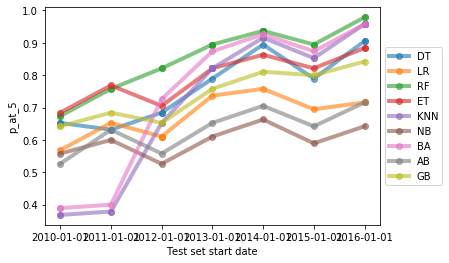

<Figure size 432x288 with 0 Axes>

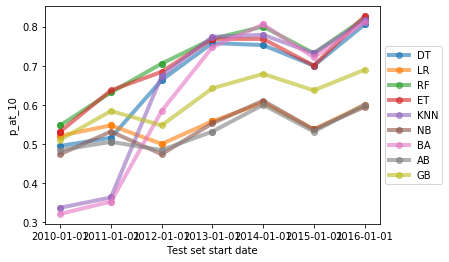

<Figure size 432x288 with 0 Axes>

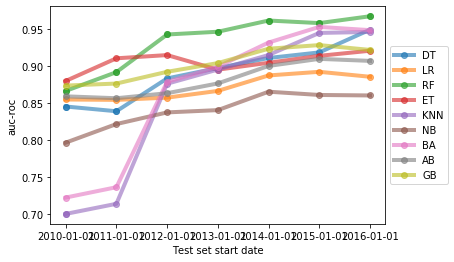

In [494]:
importlib.reload(pipeline)

for metric in metrics_to_display:
    #For each model, find the set of parameters that work the best in each train/test set
    best_models = pipeline.get_best_models_of_each_type_for_each_train_test_set(models_to_run,results,'test_set_start_date', metric)
    pipeline.plot_models_in_time(models_to_run, best_models, metric)
   